# Lending Club Assignment
K S Gopalakrishnan and Deepak Gadhamsetty

About Lending Club

Online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. 
Lending loans to ‘risky’ applicants is the largest source of financial loss when the borrower refuses to pay or runs away with the money owed. 
A loan application is accepted or rejected. An accepted loan will eventually be repaid or default.
Dataset has records of loans accepted with information including status of loan repayment (defaulted, currently active, repaid).


Problem Statement
The company wants to understand the driving factors (or driver variables) behind loan default at the time of processing the loan application, i.e. the variables which are strong indicators of default. 


Dataset – loan.csv and a data dictionary file that explains the columns in loan.csv

Loan.csv has 111 columns. This exercise is about identifying consumer attributes and loan attributes that influence tendency of default when a loan application is being processed. Therefore, we need to consider only those columns and can remove others unless any information in such columns can help fixing data issues in columns required for our work. Likewise, we need only loan statuses identifying defaults (charged off) and fully paid loans. Thus loans that are in active mode (i.e. current) can be removed.


In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
dfl = pd.read_csv("loan.csv", encoding = "ISO-8859-1", low_memory=False)

pd.options.display.float_format = '{:,.2f}'.format

#let us look at loan.csv file
print(dfl.info())
print(dfl.shape)
print(dfl.head(10))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
(39717, 111)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   
1  1077430    1314167       2500         2500         2,500.00   60 months   
2  1077175    1313524       2400         2400         2,400.00   36 months   
3  1076863    1277178      10000        10000        10,000.00   36 months   
4  1075358    1311748       3000         3000         3,000.00   60 months   
5  1075269    1311441       5000         5000         5,000.00   36 months   
6  1069639    1304742       7000         7000         7,000.00   60 months   
7  1072053    1288686       3000         3000         3,000.00   36 months   
8  1071795    1306957       5600         5600         5,600.00   60 months   
9  10

In [2]:
null_chk=100*dfl.isnull().sum()/len(dfl)
null_chk.loc[null_chk==100].count()

54

In [3]:
print(null_chk.loc[null_chk==100])

mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00
open_rv_24m                      100.00
max_bal_bc                       100.00
all_util                         100.00
total_rev_hi_lim                 100.00
inq_fi                           100.00
total_cu_tl                      100.00
inq_last_12m                     100.00
acc_open_past_24mths             100.00
avg_cur_bal                      100.00
bc_open_to_buy                   100.00
bc_util                          100.00


There are three types of data in the columns - borrower characteristics, loan characteristics and variables generated after the loan has been approved. For our business problem, we need not look at the third one and will be interested only in borrower characteristics and loan characteristics.

Within the borrower characteristics and loan characteristics there are instances where two variables denote similar things. In such cases, we need not analyse all and can restrict our analysis to the one that is easy to manage and relevant. Example - zip code and address State. Subgrade breaks down grade further - let us focus on grade as that is more manageable. Variables such as employee title and member id do not appear relevant for us.

Thus, after analysing the data dictionary, the following columns have been identified as relevant:


1. annual_inc
2. annual_inc_joint
3. application_type
4. dti
5. dti_joint
6. emp_length
7. grade
8. home_ownership
9. int_rate
10. issue_d
11. loan_amnt
12. loan_status
13. verification_status
14. purpose
15. term
16. id
17. pub_rec
18. pub_rec_bankruptcies
19. addr_state

We need to keep only these and remove other columns.

Another approach could to be look at the entire data and clean up. Then, finalize the columns required for our work.

In [4]:


dfl2=dfl[['annual_inc','annual_inc_joint','application_type','dti','dti_joint',
        'emp_length','grade','home_ownership','int_rate','issue_d','loan_amnt','loan_status',
        'verification_status','purpose','term','id','pub_rec','pub_rec_bankruptcies','addr_state']]

print(dfl2.shape)


(39717, 19)


In [5]:
my_tab = pd.crosstab(index=dfl2["loan_status"],  
                     columns="count",margins="True")                  

my_tab

col_0,count,All
loan_status,,
Charged Off,5627,5627
Current,1140,1140
Fully Paid,32950,32950
All,39717,39717


In [6]:
#let us remove "current" loan_status records as we will be interested in default and fully paid

dfl2 = dfl2[dfl2.loan_status != "Current"]
print (dfl2.shape)
print (dfl.shape)


(38577, 19)
(39717, 111)


In [7]:
my_tab = pd.crosstab(index=dfl2["loan_status"],  
                     columns="count",margins="True")                  

my_tab

col_0,count,All
loan_status,,
Charged Off,5627,5627
Fully Paid,32950,32950
All,38577,38577


In [8]:
my_tab = pd.crosstab(index=dfl2["application_type"],  
                     columns="count",margins="True")                  

my_tab

col_0,count,All
application_type,,
INDIVIDUAL,38577,38577
All,38577,38577


all applications are of individuals. We can therefore delete columns which are about joint applicants
1. annual_inc_joint
2. application_type 
3. dti_joint

In [9]:
dfl2.isnull().sum()

annual_inc                  0
annual_inc_joint        38577
application_type            0
dti                         0
dti_joint               38577
emp_length               1033
grade                       0
home_ownership              0
int_rate                    0
issue_d                     0
loan_amnt                   0
loan_status                 0
verification_status         0
purpose                     0
term                        0
id                          0
pub_rec                     0
pub_rec_bankruptcies      697
addr_state                  0
dtype: int64

In [10]:
dfl2=dfl2.drop('application_type', axis=1)
dfl2=dfl2.drop('annual_inc_joint', axis=1)
dfl2=dfl2.drop('dti_joint', axis=1)




print(dfl2.shape)

(38577, 16)


## Let us now validate the data

In [11]:
dfl2.dtypes

annual_inc              float64
dti                     float64
emp_length               object
grade                    object
home_ownership           object
int_rate                 object
issue_d                  object
loan_amnt                 int64
loan_status              object
verification_status      object
purpose                  object
term                     object
id                        int64
pub_rec                   int64
pub_rec_bankruptcies    float64
addr_state               object
dtype: object

The output shows us that we're working with a set of 38577 records and 16 columns. Some of the column variables are encoded as numeric data types (ints and floats) but a few of them are encoded as "object". Let's check the head of the data to get a better sense of what the variables look like:

In [12]:
dfl2.head(10)

,annual_inc,dti,emp_length,grade,home_ownership,int_rate,issue_d,loan_amnt,loan_status,verification_status,purpose,term,id,pub_rec,pub_rec_bankruptcies,addr_state
0,"24,000.00",27.65,10+ years,B,RENT,10.65%,Dec-11,5000,Fully Paid,Verified,credit_card,36 months,1077501,0,0.00,AZ
1,"30,000.00",1.00,< 1 year,C,RENT,15.27%,Dec-11,2500,Charged Off,Source Verified,car,60 months,1077430,0,0.00,GA
2,"12,252.00",8.72,10+ years,C,RENT,15.96%,Dec-11,2400,Fully Paid,Not Verified,small_business,36 months,1077175,0,0.00,IL
3,"49,200.00",20.00,10+ years,C,RENT,13.49%,Dec-11,10000,Fully Paid,Source Verified,other,36 months,1076863,0,0.00,CA
5,"36,000.00",11.20,3 years,A,RENT,7.90%,Dec-11,5000,Fully Paid,Source Verified,wedding,36 months,1075269,0,0.00,AZ
6,"47,004.00",23.51,8 years,C,RENT,15.96%,Dec-11,7000,Fully Paid,Not Verified,debt_consolidation,60 months,1069639,0,0.00,NC
7,"48,000.00",5.35,9 years,E,RENT,18.64%,Dec-11,3000,Fully Paid,Source Verified,car,36 months,1072053,0,0.00,CA
8,"40,000.00",5.55,4 years,F,OWN,21.28%,Dec-11,5600,Charged Off,Source Verified,small_business,60 months,1071795,0,0.00,CA
9,"15,000.00",18.08,< 1 year,B,RENT,12.69%,Dec-11,5375,Charged Off,Verified,other,60 months,1071570,0,0.00,TX
10,"72,000.00",16.12,5 years,C,OWN,14.65%,Dec-11,6500,Fully Paid,Not Verified,debt_consolidation,60 months,1070078,0,0.00,AZ


It appears we have a mixture of numeric columns and columns with text data. We have some categorical variables such as home ownership. Let us look at a statistical summary of the variables with numeric columns.

In [13]:
dfl2.describe()

,annual_inc,dti,loan_amnt,id,pub_rec,pub_rec_bankruptcies
count,"38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","37,880.00"
mean,"68,777.97",13.27,"11,047.03","676,378.71",0.06,0.04
std,"64,218.68",6.67,"7,348.44","209,263.90",0.24,0.20
min,"4,000.00",0.00,500.00,"54,734.00",0.00,0.00
25%,"40,000.00",8.13,"5,300.00","512,033.00",0.00,0.00
50%,"58,868.00",13.37,"9,600.00","656,423.00",0.00,0.00
75%,"82,000.00",18.56,"15,000.00","829,146.00",0.00,0.00
max,"6,000,000.00",29.99,"35,000.00","1,077,501.00",4.00,2.00


In [14]:
dfl2.median()

annual_inc              58,868.00
dti                         13.37
loan_amnt                9,600.00
id                     656,423.00
pub_rec                      0.00
pub_rec_bankruptcies         0.00
dtype: float64

Let us do a similar statistical analysis of "object" type

In [15]:
categorical = dfl2.dtypes[dfl2.dtypes == "object"].index
print(categorical)

dfl2[categorical].describe()

Index(['emp_length', 'grade', 'home_ownership', 'int_rate', 'issue_d',
       'loan_status', 'verification_status', 'purpose', 'term', 'addr_state'],
      dtype='object')


,emp_length,grade,home_ownership,int_rate,issue_d,loan_status,verification_status,purpose,term,addr_state
count,37544,38577,38577,38577,38577,38577,38577,38577,38577,38577
unique,11,7,5,370,55,2,3,14,2,50
top,10+ years,B,RENT,10.99%,Nov-11,Fully Paid,Not Verified,debt_consolidation,36 months,CA
freq,8488,11675,18480,913,2062,32950,16694,18055,29096,6949


# analyse loan amount

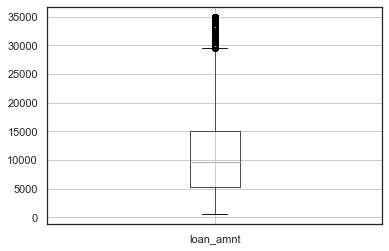

In [16]:
dfl2.boxplot(column="loan_amnt")

In [17]:
dfl2[dfl2["loan_amnt"]>30000].count()

annual_inc              735
dti                     735
emp_length              720
grade                   735
home_ownership          735
int_rate                735
issue_d                 735
loan_amnt               735
loan_status             735
verification_status     735
purpose                 735
term                    735
id                      735
pub_rec                 735
pub_rec_bankruptcies    735
addr_state              735
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbe031ec50>]],
      dtype=object)

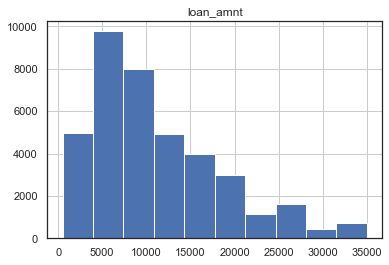

In [18]:
dfl2.hist(column="loan_amnt")

Loan Amount looks okay; many loans are for small values and hence the median is lower than the mean.

# analyse annual salary

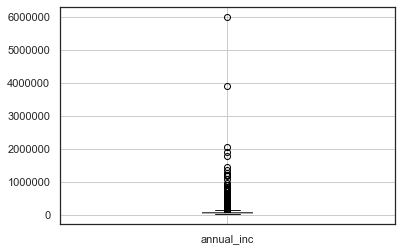

In [19]:
dfl2.boxplot(column="annual_inc")

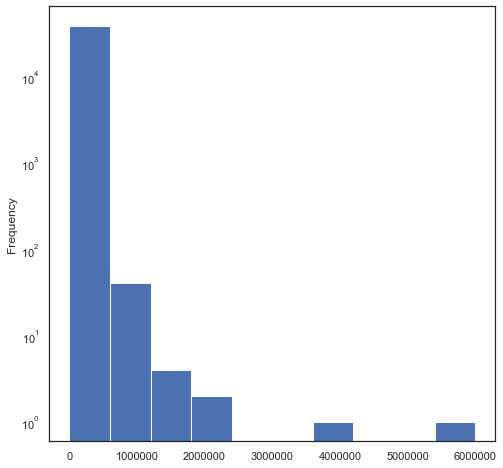

In [20]:

dfl2["annual_inc"].plot(kind="hist",  
                      figsize=(8,8), logy=True)   
                      


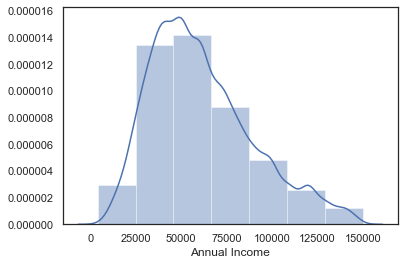

In [21]:
sns.distplot(dfl2[dfl2['annual_inc'] < 150000]['annual_inc'], bins=7)
plt.xlabel('Annual Income')
plt.show()



In [22]:
dfl2[dfl2["annual_inc"]>=130000].count()

annual_inc              2631
dti                     2631
emp_length              2609
grade                   2631
home_ownership          2631
int_rate                2631
issue_d                 2631
loan_amnt               2631
loan_status             2631
verification_status     2631
purpose                 2631
term                    2631
id                      2631
pub_rec                 2631
pub_rec_bankruptcies    2585
addr_state              2631
dtype: int64

In [23]:
print(dfl2[dfl2["annual_inc"]>=600000].describe())
print(dfl2[dfl2["annual_inc"]>=600000].median())

        annual_inc   dti  loan_amnt         id  pub_rec  pub_rec_bankruptcies
count        51.00 51.00      51.00      51.00    51.00                 49.00
mean  1,062,806.23  2.45  14,765.20 556,864.20     0.04                  0.04
std     884,218.07  3.50   9,442.91 151,029.77     0.20                  0.20
min     600,000.00  0.00   1,000.00 157,169.00     0.00                  0.00
25%     700,026.93  0.61   6,500.00 465,915.50     0.00                  0.00
50%     780,000.00  1.46  12,000.00 519,954.00     0.00                  0.00
75%   1,128,000.00  2.37  25,000.00 600,165.50     0.00                  0.00
max   6,000,000.00 21.81  35,000.00 989,796.00     1.00                  1.00
annual_inc             780,000.00
dti                          1.46
loan_amnt               12,000.00
id                     519,954.00
pub_rec                      0.00
pub_rec_bankruptcies         0.00
dtype: float64


There are outliers in annual income. Out of 38577 records, 51 records (0.13%) have value 600,000 and above and 79 records where value is less than 10,000 (0.2%). However, at the lower end the distribution is smooth. We have to take a call on outliers of higher income.

Let us analyse income, loan amount, dti and a new ratio of income / loan amount to see whether any patterns exist.

In [24]:
inc_outlier=dfl2.copy()
inc_outlier['inc_loan']=inc_outlier['annual_inc']/inc_outlier['loan_amnt']

inc_outlier1=inc_outlier[inc_outlier['inc_loan']>25]
#print(inc_outlier1[["annual_inc","dti","loan_amnt","loan_status",'inc_loan']])
print('\n')
print('\n')

inc_outlier2=inc_outlier[inc_outlier['annual_inc']>600000]
print(inc_outlier2[["annual_inc","dti","loan_amnt","loan_status",'inc_loan']])





        annual_inc   dti  loan_amnt  loan_status  inc_loan
5168    725,000.00  5.40      30000   Fully Paid     24.17
7247  1,782,000.00  1.31      12025   Fully Paid    148.19
7531    900,000.00  4.54      30000   Fully Paid     30.00
7549    750,000.00  5.25      30000   Fully Paid     25.00
10621 1,250,000.00 21.81      15775  Charged Off     79.24
12781   750,000.00  1.55      35000   Fully Paid     21.43
14174   648,000.00  4.65      35000   Fully Paid     18.51
21282   780,000.00  0.58       4500   Fully Paid    173.33
21379   948,000.00  2.40       2000   Fully Paid    474.00
21412 1,200,000.00  1.46      10000   Fully Paid    120.00
22879   828,000.00  2.00       4200   Fully Paid    197.14
23551 1,900,000.00  0.57       1500   Fully Paid  1,266.67
24166 1,200,000.00  0.41      25000   Fully Paid     48.00
24733   667,680.00  1.55      10000   Fully Paid     66.77
24811   756,000.00  1.17      10000   Fully Paid     75.60
25043   648,000.00  1.82      15000   Fully Paid    

It is hard to see what is going wrong with annual income at higher levels. Our attempts to identify from income-to-loan and dti did not yield any pattern.

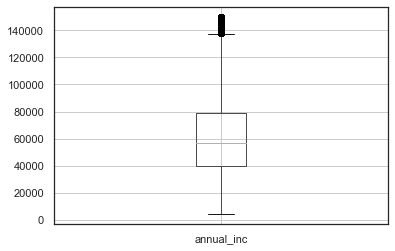

In [25]:
df_filtered = dfl2[dfl2['annual_inc']<=150000]
df_filtered.boxplot(column="annual_inc")


Out of the total 38577 records, 51 records (0.13%) with value of 600,000 and above certainly look like outliers. The boxplot fits well if we remove 1486 (3.85%) records with value above 150,000. At this stage, we will not remove these records but keep income above 150,000 as one of the categories when we analyse further by income bands. 

# analyse dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
 

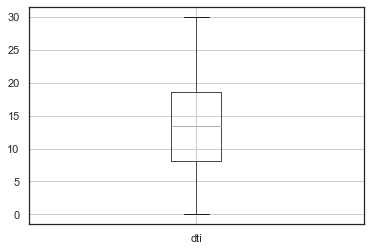

In [26]:
dfl2.boxplot(column="dti")

dti seems to be alright

# analyse employee length of service


In [27]:
dfl2.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [28]:
dfl2["emp_length"].isnull().sum()

1033

In [29]:
print(dfl2["emp_length"].dtypes)

object


In [30]:
#convert to integer
emp_length_dictionary = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [31]:
dfl2 = dfl2.replace({"emp_length": emp_length_dictionary})


In [32]:
print(dfl2["emp_length"].dtypes)

float64


In [33]:
my_tab = pd.crosstab(index=dfl2["emp_length"],  
                     columns="count")                  

my_tab

col_0,count
emp_length,
0.00,4508
1.00,3169
2.00,4291
3.00,4012
4.00,3342
5.00,3194
6.00,2168
7.00,1711
8.00,1435


In [34]:
100*my_tab/my_tab.sum()

col_0,count
emp_length,
0.00,12.01
1.00,8.44
2.00,11.43
3.00,10.69
4.00,8.90
5.00,8.51
6.00,5.77
7.00,4.56
8.00,3.82


1033 out of 38577 records have missing values. This is about 2.7%. Let us fill these NaN with 10, which is the most occuring.

In [35]:
#filling missing value with 10 (mode)
dfl2["emp_length"].fillna(10, inplace = True)

In [36]:
my_tab = pd.crosstab(index=dfl2["emp_length"],  
                     columns="count")                  

my_tab

col_0,count
emp_length,
0.00,4508
1.00,3169
2.00,4291
3.00,4012
4.00,3342
5.00,3194
6.00,2168
7.00,1711
8.00,1435


In [37]:
100*my_tab/my_tab.sum()

col_0,count
emp_length,
0.00,11.69
1.00,8.21
2.00,11.12
3.00,10.40
4.00,8.66
5.00,8.28
6.00,5.62
7.00,4.44
8.00,3.72


In [38]:
dfl2["emp_length"].isnull().sum()

0

# analyse interest rate

In [39]:
my_tab = pd.crosstab(index=dfl2["int_rate"],  
                     columns="count", margins="True")                  

my_tab


col_0,count,All
int_rate,,
10.00%,249,249
10.01%,7,7
10.08%,48,48
10.14%,10,10
10.20%,18,18
...,...,...
9.88%,181,181
9.91%,357,357
9.96%,19,19


In [40]:
#remove % sign and convert from object to float
dfl2['int_rate'] = dfl2['int_rate'].str.strip('%').astype('float')

In [41]:
my_tab = pd.crosstab(index=dfl2["int_rate"],  
                     columns="count", margins="True")                  

my_tab

col_0,count,All
int_rate,,
5.42,573,573
5.79,410,410
5.99,347,347
6.0,16,16
6.03,447,447
...,...,...
23.59,4,4
23.91,9,9
24.11,3,3


In [42]:
dfl2.dtypes

annual_inc              float64
dti                     float64
emp_length              float64
grade                    object
home_ownership           object
int_rate                float64
issue_d                  object
loan_amnt                 int64
loan_status              object
verification_status      object
purpose                  object
term                     object
id                        int64
pub_rec                   int64
pub_rec_bankruptcies    float64
addr_state               object
dtype: object

# analyse loan status


In [43]:
# it will be good to have numeric value to calculate average default rates; creating a new variable
dfl2['status_code'] = [100 if x =='Charged Off' else 0 for x in dfl2['loan_status']]

In [44]:
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            38577 non-null  float64
 1   dti                   38577 non-null  float64
 2   emp_length            38577 non-null  float64
 3   grade                 38577 non-null  object 
 4   home_ownership        38577 non-null  object 
 5   int_rate              38577 non-null  float64
 6   issue_d               38577 non-null  object 
 7   loan_amnt             38577 non-null  int64  
 8   loan_status           38577 non-null  object 
 9   verification_status   38577 non-null  object 
 10  purpose               38577 non-null  object 
 11  term                  38577 non-null  object 
 12  id                    38577 non-null  int64  
 13  pub_rec               38577 non-null  int64  
 14  pub_rec_bankruptcies  37880 non-null  float64
 15  addr_state         

In [45]:
my_tab = pd.crosstab(index=dfl2["status_code"],  
                     columns="count")                  

my_tab

col_0,count
status_code,
0,32950
100,5627


# analyse term

In [46]:
my_tab = pd.crosstab(index=dfl2["term"],  
                     columns="count", margins="True")                  

my_tab


col_0,count,All
term,,
36 months,29096,29096
60 months,9481,9481
All,38577,38577


In [47]:
#convert term to numeric
dfl2['term'] = dfl2.term.apply(lambda x: x.split()[0])
dfl2['term'] = pd.to_numeric(dfl2['term'])

In [48]:
my_tab = pd.crosstab(index=dfl2["term"],  
                     columns="count", margins="True")                  

my_tab
#term is good

col_0,count,All
term,,
36,29096,29096
60,9481,9481
All,38577,38577


# analyse State

In [49]:
my_tab = pd.crosstab(index=dfl2["addr_state"],  
                     columns="count", margins="True")                  

my_tab

#addr_state is good; States in the USA

col_0,count,All
addr_state,,
AK,78,78
AL,435,435
AR,235,235
AZ,849,849
CA,6949,6949
CO,766,766
CT,726,726
DC,211,211
DE,113,113


# analyse grade

In [50]:
my_tab = pd.crosstab(index=dfl2["grade"],  
                     columns="count", margins="True")                  

my_tab

#grade is good; 

col_0,count,All
grade,,
A,10045,10045
B,11675,11675
C,7834,7834
D,5085,5085
E,2663,2663
F,976,976
G,299,299
All,38577,38577


# analyse verification status

In [51]:
my_tab = pd.crosstab(index=dfl2["verification_status"],  
                     columns="count", margins="True")                  

my_tab

# looks good

col_0,count,All
verification_status,,
Not Verified,16694,16694
Source Verified,9677,9677
Verified,12206,12206
All,38577,38577


# analyse home ownership

In [52]:
my_tab = pd.crosstab(index=dfl2["home_ownership"],  
                     columns="count", margins="True")                  

my_tab



col_0,count,All
home_ownership,,
MORTGAGE,17021,17021
NONE,3,3
OTHER,98,98
OWN,2975,2975
RENT,18480,18480
All,38577,38577


In [53]:
#for ease of analysis without any distortion, let us replace the 3 NONE with OTHER
dfl2['home_ownership']=dfl2['home_ownership'].replace(to_replace ="NONE", value ="OTHER") 


In [54]:
my_tab = pd.crosstab(index=dfl2["home_ownership"], 
                            columns=dfl2["loan_status"])
            
my_tab

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2327,14694
OTHER,18,83
OWN,443,2532
RENT,2839,15641


# analyse pub rec
Number of derogatory public records

In [55]:
my_tab = pd.crosstab(index=dfl2["pub_rec"],  
                     columns="count", margins="True")                  

my_tab




col_0,count,All
pub_rec,,
0,36507,36507
1,2013,2013
2,48,48
3,7,7
4,2,2
All,38577,38577


### observation
94.6% of the records have pub rec value zero. This variable is unlikely to be useful for our univariate or multivariate analysis as no material insights will be available. A reasonably good spread of data across different values would have made this variable useful. We will therefore not pursue this variable further.

# analyse pub rec bankruptcies
Number of public record bankruptcies

In [56]:
my_tab = pd.crosstab(index=dfl2["pub_rec_bankruptcies"],  
                     columns="count", margins="True")                  

my_tab




col_0,count,All
pub_rec_bankruptcies,,
0.0,36238,36238
1.0,1637,1637
2.0,5,5
All,37880,37880


In [57]:
dfl2["pub_rec_bankruptcies"].isnull().sum()

697

### observation
1.84% of records have missing value. Out of the remaining, 95.7% of the records have pub rec bankruptcies value zero. This variable is unlikely to be useful for our univariate or multivariate analysis as no material insights will be available. A reasonably good spread of data across different values would have made this variable useful. We will therefore not pursue this variable further. 
Also, we will have to either eliminate the 697 records or keep the records as it is or assign a value (most likely 0.0) which adds to the data uncertainty.

In [58]:
prb_null=dfl2[dfl2['pub_rec_bankruptcies'].isnull()]
my_tab = pd.crosstab(index=prb_null["loan_status"],  
                     columns="count", margins="True")                  

my_tab

col_0,count,All
loan_status,,
Charged Off,118,118
Fully Paid,579,579
All,697,697


# analyse purpose (of loan)

In [59]:
my_tab = pd.crosstab(index=dfl2["loan_status"], 
                            columns=dfl2["purpose"])
my_tab/my_tab.sum()

#looks good

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,0.11,0.11,0.15,0.17,0.12,0.16,0.10,0.16,0.16,0.16,0.19,0.27,0.14,0.10
Fully Paid,0.89,0.89,0.85,0.83,0.88,0.84,0.90,0.84,0.84,0.84,0.81,0.73,0.86,0.90


# analyse issue date
analyse data, change to date field, extract month, extract year

In [60]:
dfl2['issue_d']=pd.to_datetime(dfl2['issue_d'], format= '%b-%y')


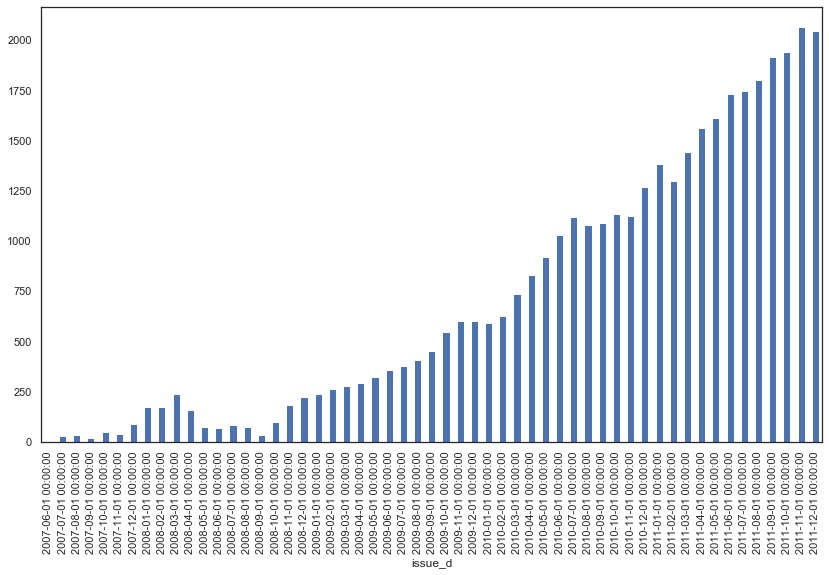

In [61]:
my_tab = pd.crosstab(index=dfl2["issue_d"],  
                     columns="count") 
my_tab.plot(kind="bar",  figsize=(14,8), legend=False)


In [62]:
print(dfl2["issue_d"].dtypes)

datetime64[ns]


In [63]:
#creating two columns year (object) and month (numeric)
dfl2['year'] = dfl2['issue_d'].dt.year.astype(str)


dfl2['month'] = dfl2['issue_d'].dt.month

In [64]:
dfl2['year'].sample(5)

10779    2011
25602    2010
11609    2011
34600    2009
13047    2011
Name: year, dtype: object

In [65]:
dfl2['month'].sample(5)

10986     7
38873     4
31939     2
2129     12
31271     3
Name: month, dtype: int64

# Creating Groups (bins)

We now have the cleaned up data of relevant information to perform analysis which would help in assessing the default risk at the time of processing a loan application. It will be useful to have some of the variables grouped by range of values for meaningful analysis. Let us look at these.
1. Interest Rate
2. Annual Income
3. Loan Amount
4. dti

In [66]:
dfl2.shape

(38577, 19)

duplicate records, if any, to be dropped

In [67]:
dfl2=dfl2.drop_duplicates()

In [68]:
dfl2.shape

(38577, 19)

# grouping interest rates

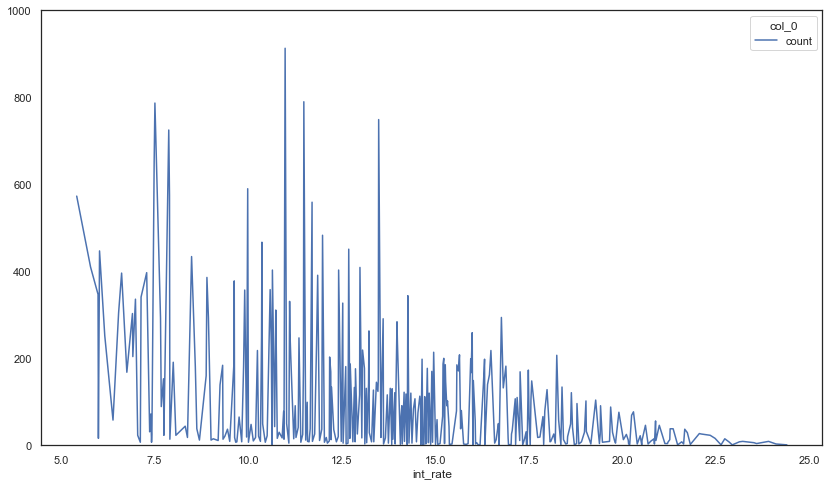

In [69]:
my_tab = pd.crosstab(index=dfl2["int_rate"],  
                     columns="count") 
my_tab.plot(kind="line",  figsize=(14,8), ylim=(0,1000))

In [70]:


def alert(c):
  if c['int_rate'] <= 7.5:
    return 'upto 7.5'
  elif c['int_rate'] <= 9.5:
    return '>7.5 - 9.5'
  elif c['int_rate'] <= 11.5:
    return '>9.5 - 11.5'
  elif c['int_rate'] <= 13.5:
    return '>11.5 - 13.5'
  elif c['int_rate'] <= 15.5:
    return '>13.5 - 15.5'
  elif c['int_rate'] <= 17.5:
    return '>15.5 - 17.5'
  else:
    return '>17.5'


dfl2['int_group'] = dfl2.apply(alert, axis=1)

In [71]:
my_tab = pd.crosstab(index=dfl2["int_group"],  
                     columns=dfl2["loan_status"], margins=True) 
my_tab

loan_status,Charged Off,Fully Paid,All
int_group,,,
>11.5 - 13.5,1201,6505,7706
>13.5 - 15.5,985,4396,5381
>15.5 - 17.5,941,3084,4025
>17.5,910,1963,2873
>7.5 - 9.5,362,4509,4871
>9.5 - 11.5,972,7379,8351
upto 7.5,256,5114,5370
All,5627,32950,38577


# grouping dti

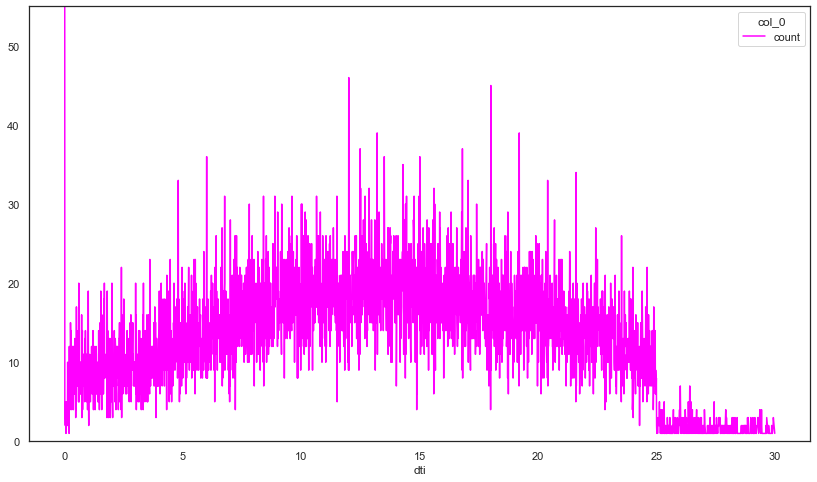

In [72]:
my_tab = pd.crosstab(index=dfl2["dti"],  
                     columns="count") 
my_tab.plot(kind="line",  figsize=(14,8), ylim=(0,55), color="magenta")

In [73]:
def alert(c):
  if c['dti'] <= 7.5:
    return 'upto 7.5'
  elif c['dti'] <= 11.5:
    return '>7.5 - 11.5'
  elif c['dti'] <= 15.0:
    return '>11.5 - 15.0'
  elif c['dti'] <= 19.0:
    return '>15.0 - 19.0'
  else:
    return '>19.0'


dfl2['dti_group'] = dfl2.apply(alert, axis=1)

In [74]:
my_tab = pd.crosstab(index=dfl2["dti_group"],  
                     columns=dfl2["loan_status"], margins=True) 
my_tab

loan_status,Charged Off,Fully Paid,All
dti_group,,,
>11.5 - 15.0,1035,5779,6814
>15.0 - 19.0,1111,6023,7134
>19.0,1483,7395,8878
>7.5 - 11.5,947,6201,7148
upto 7.5,1051,7552,8603
All,5627,32950,38577


# grouping income

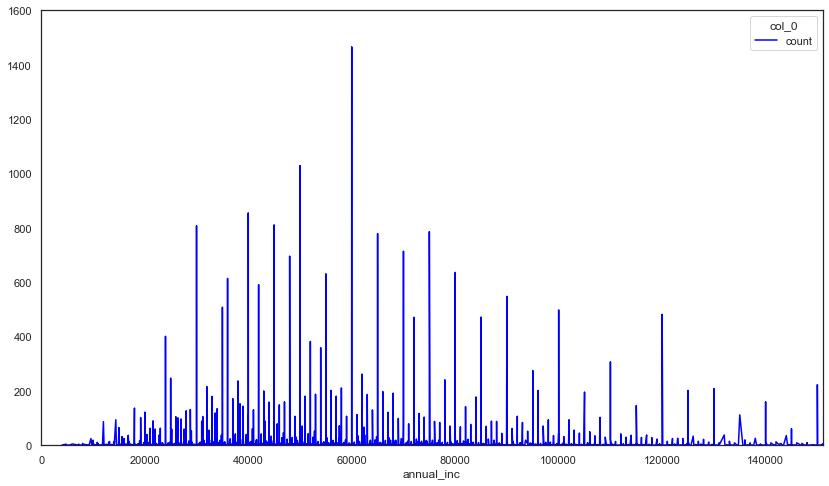

In [75]:
my_tab = pd.crosstab(index=dfl2["annual_inc"],  
                     columns="count") 
my_tab.plot(kind="line",  figsize=(14,8), xlim=(0,151000),ylim=(0,1600), color="blue")

In [76]:
dfl2['annual_inc'].describe()

count      38,577.00
mean       68,777.97
std        64,218.68
min         4,000.00
25%        40,000.00
50%        58,868.00
75%        82,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [77]:


def alert(c):
  if c['annual_inc'] <= 30000:
    return 'upto 30K'
  elif c['annual_inc'] <= 45000:
    return '>30K - 45K'
  elif c['annual_inc'] <= 60000:
    return '>45K - 60K'
  elif c['annual_inc'] <= 80000:
    return '>60K - 80K'
  elif c['annual_inc'] <= 120000:
    return '>80K - 120K'
  
  else:
    return '>120K'


dfl2['annual_inc_group'] = dfl2.apply(alert, axis=1)

In [78]:
my_tab = pd.crosstab(index=dfl2["annual_inc_group"],  
                     columns=dfl2["loan_status"], margins=True) 
my_tab

loan_status,Charged Off,Fully Paid,All
annual_inc_group,,,
>120K,348,2805,3153
>30K - 45K,1328,6548,7876
>45K - 60K,1313,7221,8534
>60K - 80K,1024,6597,7621
>80K - 120K,775,6067,6842
upto 30K,839,3712,4551
All,5627,32950,38577


# grouping loan amount

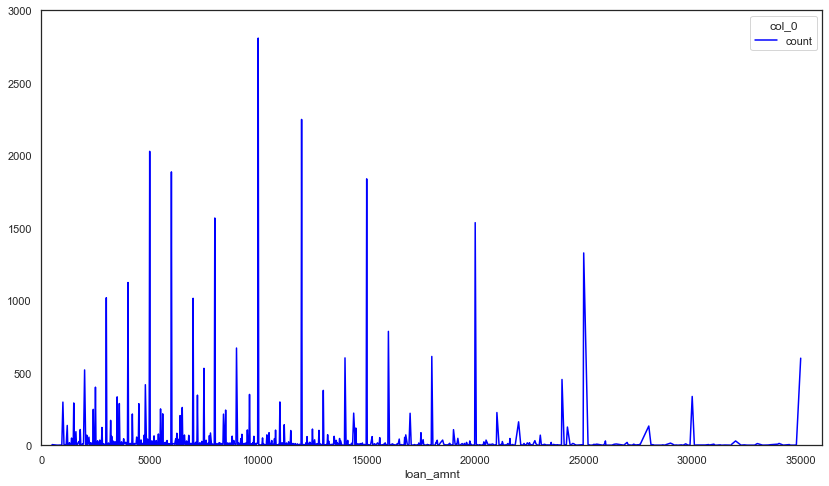

In [79]:
my_tab = pd.crosstab(index=dfl2["loan_amnt"],  
                     columns="count") 
my_tab.plot(kind="line",  figsize=(14,8), xlim=(0,36000),ylim=(0,3000), color="blue")

In [80]:
def alert(c):
  if c['loan_amnt'] <= 4000:
    return 'upto 4K'
  elif c['loan_amnt'] <= 7000:
    return '>4K - 7K'
  elif c['loan_amnt'] <= 10000:
    return '>7K - 10K'
  elif c['loan_amnt'] <= 13000:
    return '>10K - 13K'
  elif c['loan_amnt'] <= 16000:
    return '>13K - 16K'
  elif c['loan_amnt'] <= 21000:
    return '>16K - 21K'
  else:
    return '>21K'


dfl2['loan_amnt_group'] = dfl2.apply(alert, axis=1)

In [81]:
my_tab = pd.crosstab(index=dfl2["loan_amnt_group"],  
                     columns=dfl2["loan_status"], margins=True) 
my_tab

loan_status,Charged Off,Fully Paid,All
loan_amnt_group,,,
>10K - 13K,575,3770,4345
>13K - 16K,674,3705,4379
>16K - 21K,623,3025,3648
>21K,799,3132,3931
>4K - 7K,1031,7157,8188
>7K - 10K,1069,6898,7967
upto 4K,856,5263,6119
All,5627,32950,38577


# Univariate Analysis
Analysis of each variable - plotting the data distribution and default rate distribution


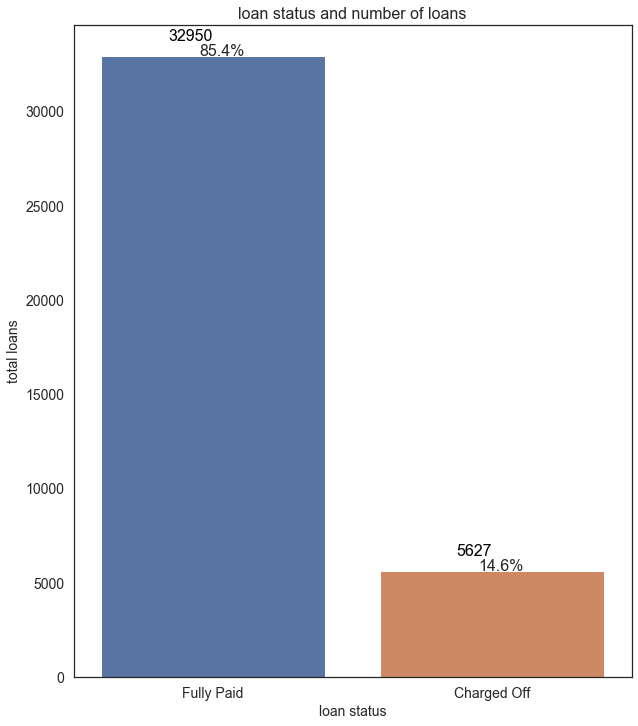

In [82]:

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 16)
        
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='right', va='center', fontsize=16, color='black', xytext=(0, 20),
                    textcoords='offset points')
    plt.savefig('loan data.png', bbox_inches='tight' )
    plt.show()

plt.figure(figsize=(10, 12))  

ax=sns.countplot('loan_status',data=dfl2)
plt.xticks(size=14)
plt.xlabel("loan status",fontsize = 14)
plt.yticks(size=14)
plt.ylabel("total loans",fontsize = 14)
plt.title("loan status and number of loans",fontsize = 16)
without_hue(ax,dfl2.loan_status)


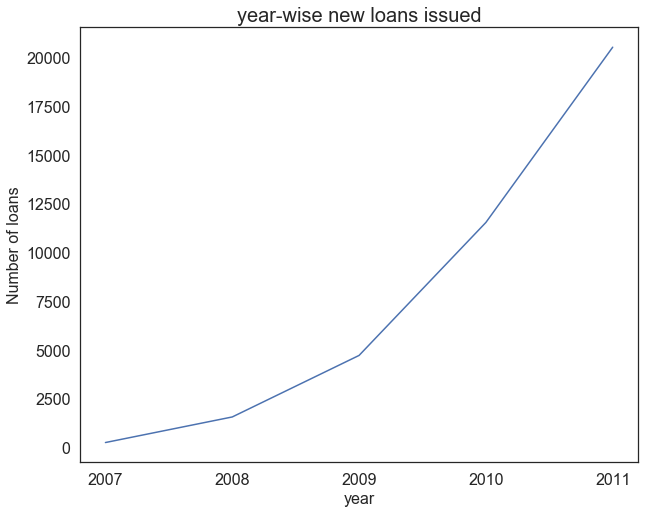

In [83]:

plot3=dfl2.groupby(['year'],as_index = False)['id'].count()

plt.figure(figsize=(10, 8))
                   
c_plot=sns.lineplot(x = 'year',
            y = 'id',
               
            data=plot3
            )
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("year",fontsize = 16)
plt.ylabel("Number of loans",fontsize = 16)
plt.title("year-wise new loans issued",fontsize = 20)


plt.savefig('year-wise loans data.png', bbox_inches='tight')
plt.show()


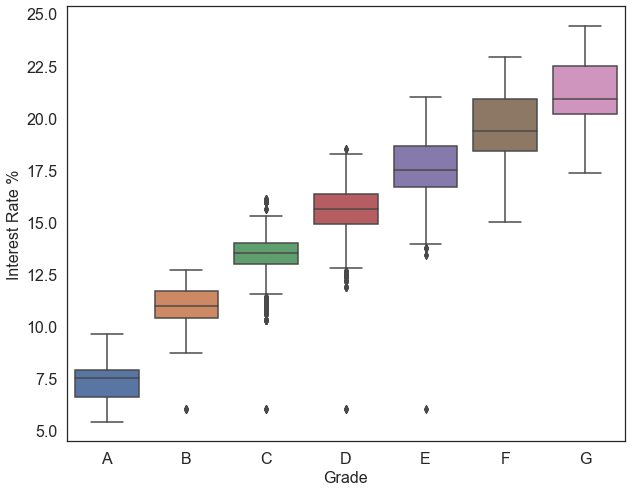

In [84]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='int_rate', x='grade', order = ["A","B","C","D","E","F","G"], data=dfl2)
plt.xlabel('Grade', fontsize = 16)
plt.ylabel('Interest Rate %', fontsize = 16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig('grade - interest.png',  bbox_inches='tight')
plt.show()


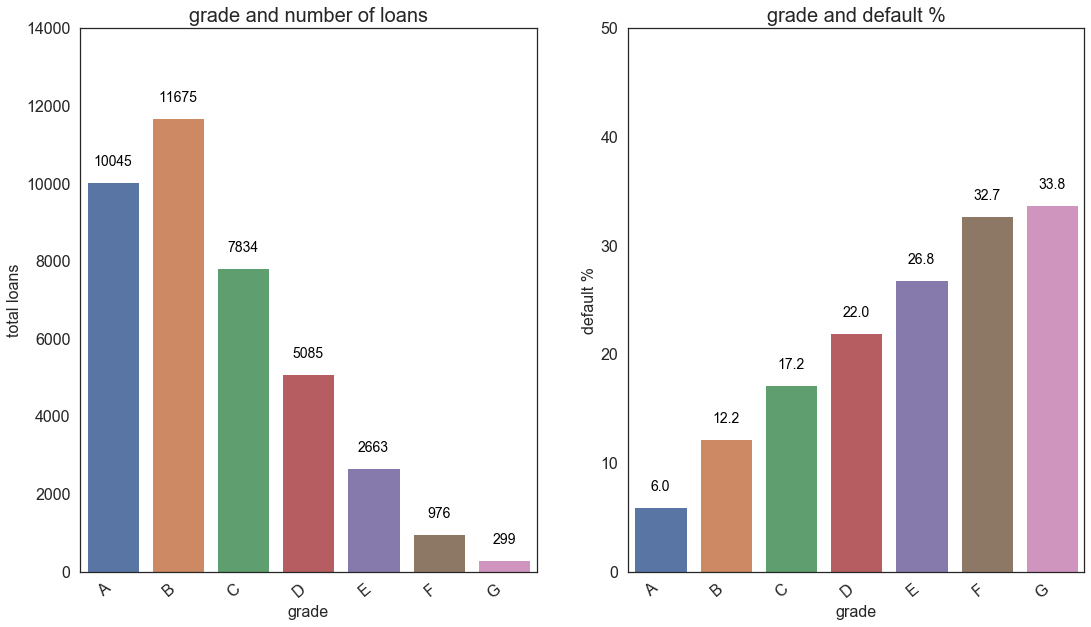

In [85]:



fig, axs = plt.subplots(figsize=(18, 10))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'grade',
            order = ["A","B","C","D","E","F","G"],
            data = dfl2)

a_plot.set(ylim=(0, 14000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("grade",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("grade and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'grade',
            y = 'status_code',
            order = ["A","B","C","D","E","F","G"],
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("grade",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("grade and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")




plt.savefig('grade.png', bbox_inches='tight')

plt.show()

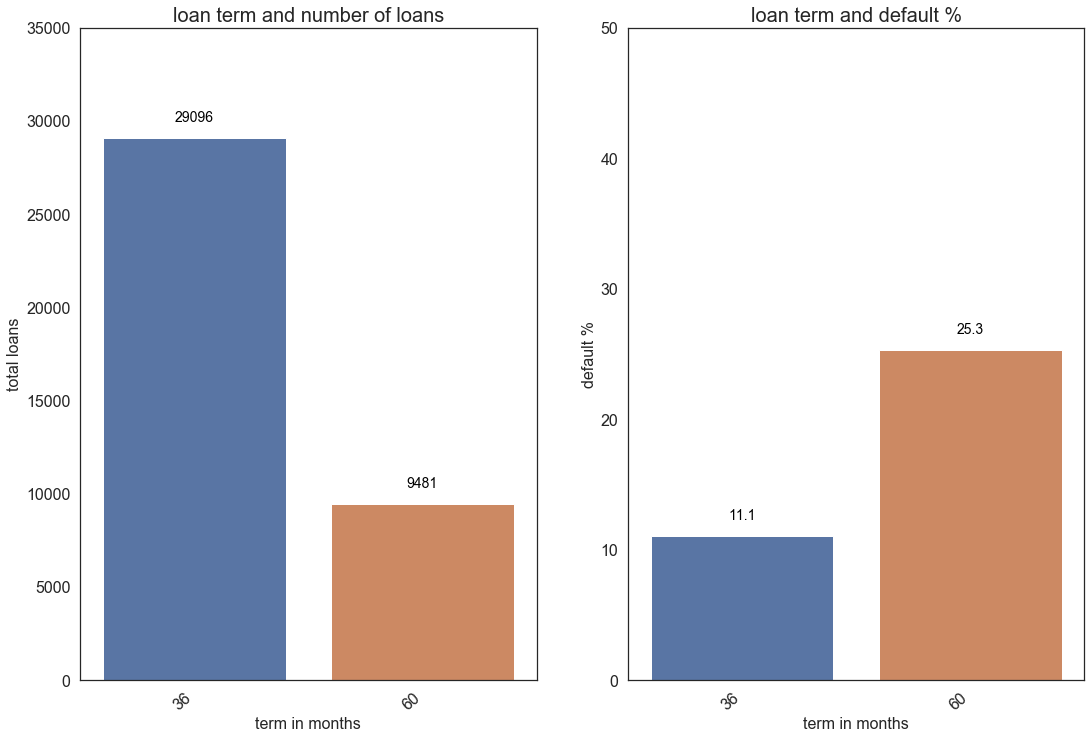

In [86]:

fig, axs = plt.subplots(figsize=(18, 12))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'term',
             data = dfl2)

a_plot.set(ylim=(0, 35000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("term in months",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("loan term and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'term',
            y = 'status_code',
            
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')

plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("term in months",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("loan term and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")

plt.savefig('term.png', bbox_inches='tight')

plt.show()

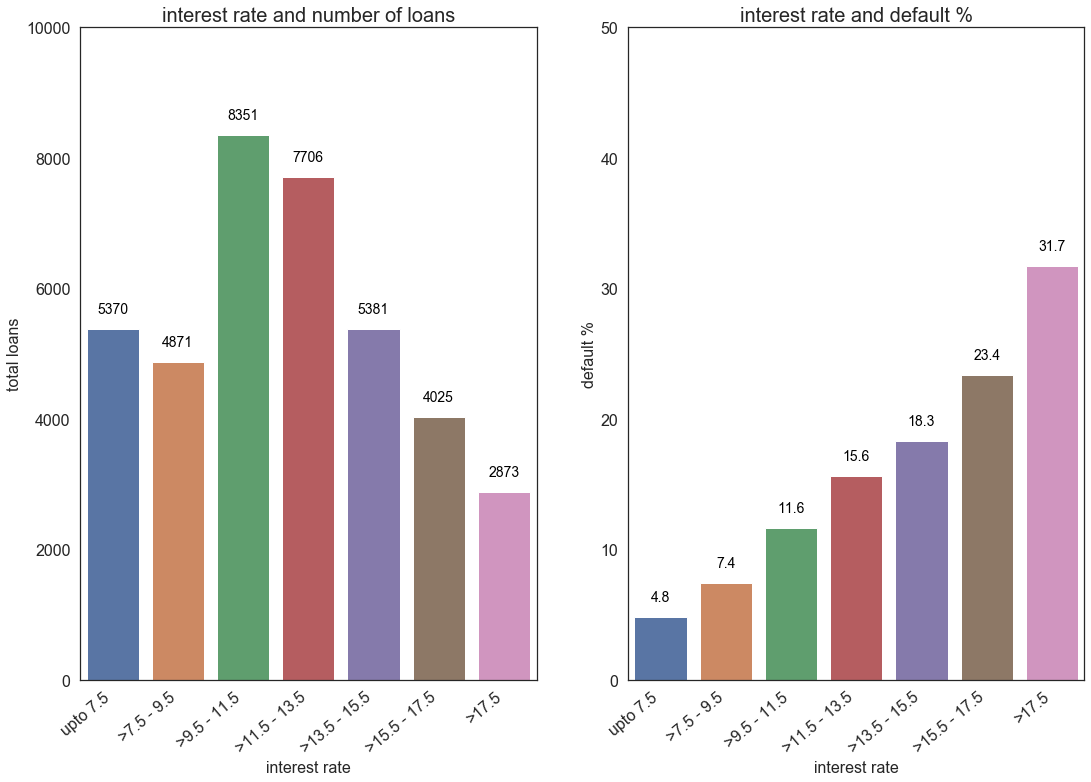

In [87]:

fig, axs = plt.subplots(figsize=(18, 12))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'int_group',
          order = ["upto 7.5",">7.5 - 9.5",">9.5 - 11.5",">11.5 - 13.5",">13.5 - 15.5",">15.5 - 17.5",
                  ">17.5"],
            data = dfl2)

a_plot.set(ylim=(0, 10000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("interest rate",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("interest rate and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'int_group',
            y = 'status_code',
            order = ["upto 7.5",">7.5 - 9.5",">9.5 - 11.5",">11.5 - 13.5",">13.5 - 15.5",">15.5 - 17.5",
                  ">17.5"],
            data = dfl2, 
           estimator = np.mean, ci=0
            )

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("interest rate",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("interest rate and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.savefig('int-rate.png', bbox_inches='tight')

plt.show()

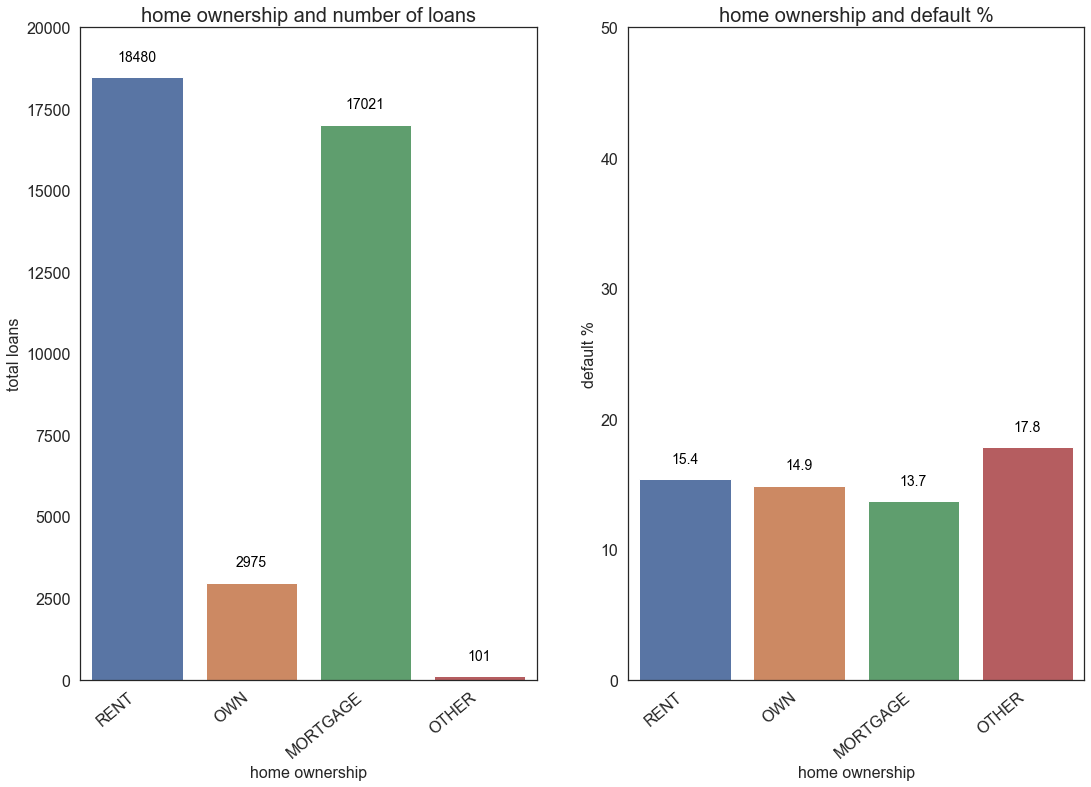

In [88]:

fig, axs = plt.subplots(figsize=(18, 12))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'home_ownership',
            data = dfl2)

a_plot.set(ylim=(0, 20000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("home ownership",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("home ownership and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'home_ownership',
            y = 'status_code',
            data = dfl2, 
           estimator = np.mean, ci=0
            )

a_plot.set(ylim=(0, 50))
ax=a_plot
for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')

plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("home ownership",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("home ownership and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.savefig('home ownership.png', bbox_inches='tight')

plt.show()

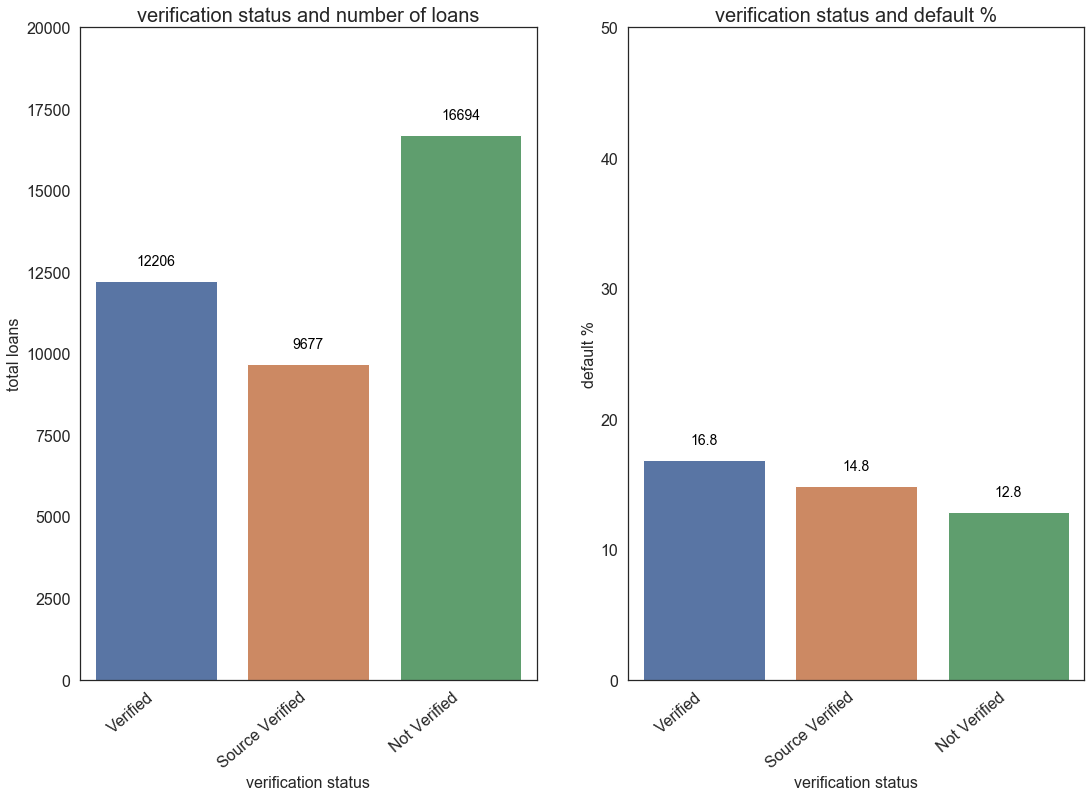

In [89]:

fig, axs = plt.subplots(figsize=(18, 12))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'verification_status',
            data = dfl2)

a_plot.set(ylim=(0, 20000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("verification status",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("verification status and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")

plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'verification_status',
            y = 'status_code',
            data = dfl2, 
           estimator = np.mean, ci=0
            )

a_plot.set(ylim=(0, 50))
ax=a_plot
for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')

plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("verification status",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("verification status and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.savefig('verification.png', bbox_inches='tight')
plt.show()

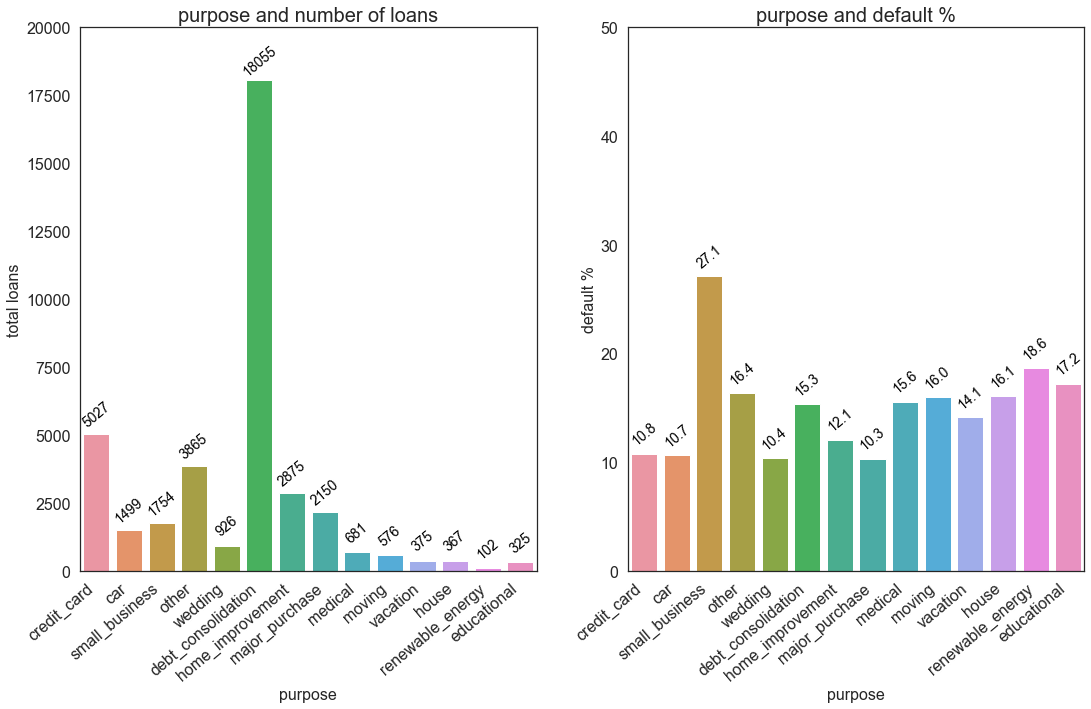

In [90]:

fig, axs = plt.subplots(figsize=(18, 10))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'purpose',
            data = dfl2)

a_plot.set(ylim=(0, 20000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', rotation=40, fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("purpose",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("purpose and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'purpose',
            y = 'status_code',
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', rotation=40, fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("purpose",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("purpose and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.savefig('purpose.png', bbox_inches='tight')

plt.show()

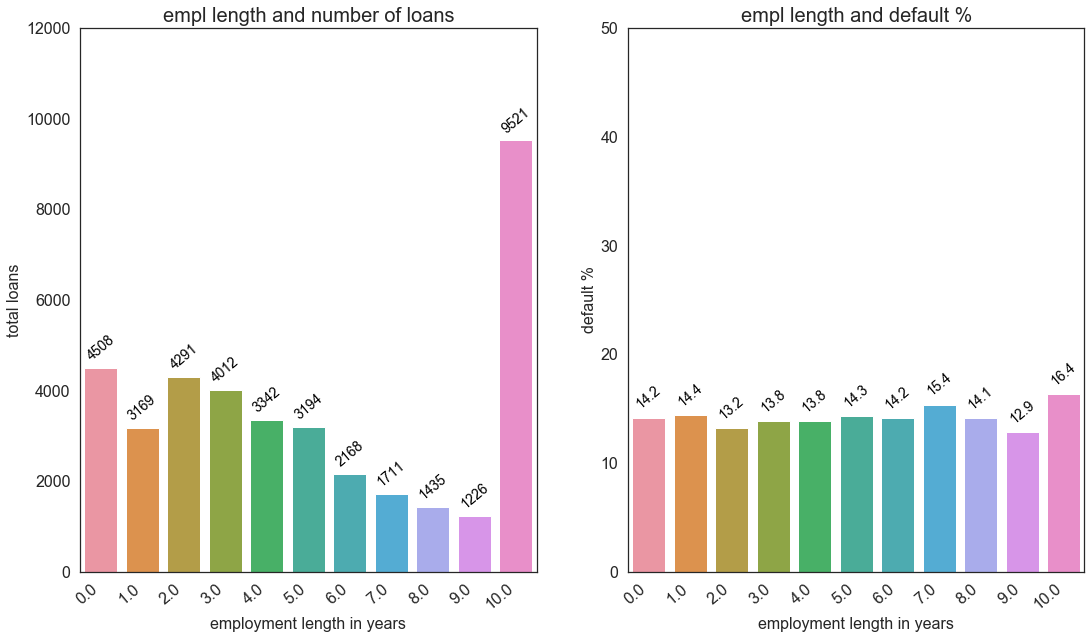

In [91]:
fig, axs = plt.subplots(figsize=(18, 10))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'emp_length',
            data = dfl2)

a_plot.set(ylim=(0, 12000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',rotation=40, fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("employment length in years",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("empl length and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'emp_length',
            y = 'status_code',
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', rotation=40,fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("employment length in years",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("empl length and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")

plt.savefig('employment length.png', bbox_inches='tight')

plt.show()

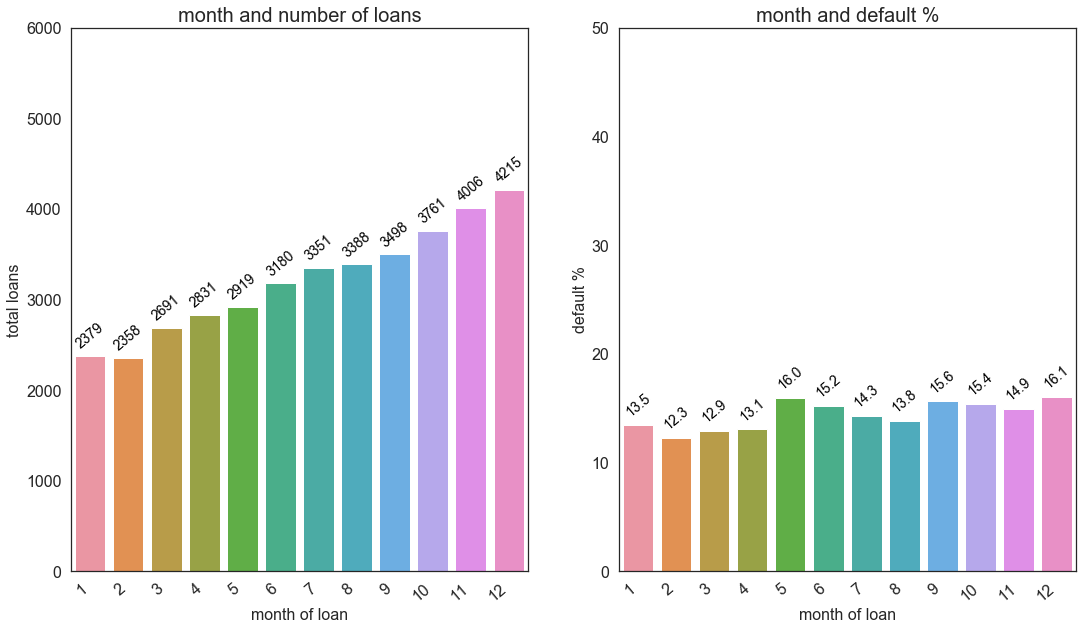

In [92]:
fig, axs = plt.subplots(figsize=(18, 10))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'month',
            data = dfl2)

a_plot.set(ylim=(0, 6000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', rotation=40,fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("month of loan",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("month and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'month',
            y = 'status_code',
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', rotation=40,fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("month of loan",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("month and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")

plt.savefig('month of loan.png', bbox_inches='tight')

plt.show()

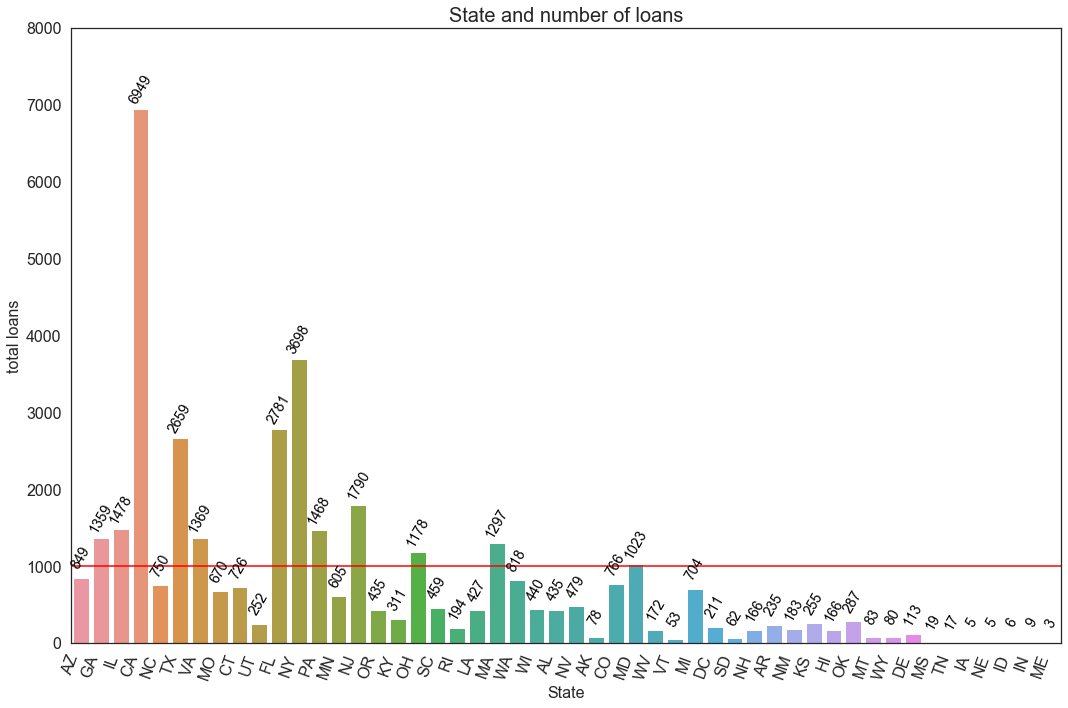

In [93]:
plt.figure(figsize=(15,10))
a_plot=sns.countplot(x = 'addr_state',
            data = dfl2)

a_plot.set(ylim=(0, 8000))
ax=a_plot
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', rotation=60,fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')
#_ = g.set_ylim(0,120) #To make space for the annotations

plt.axhline(1000, color='red')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("State",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("State and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=70, ha="right")
plt.tight_layout()

plt.savefig('State1.png', bbox_inches='tight')

plt.show()

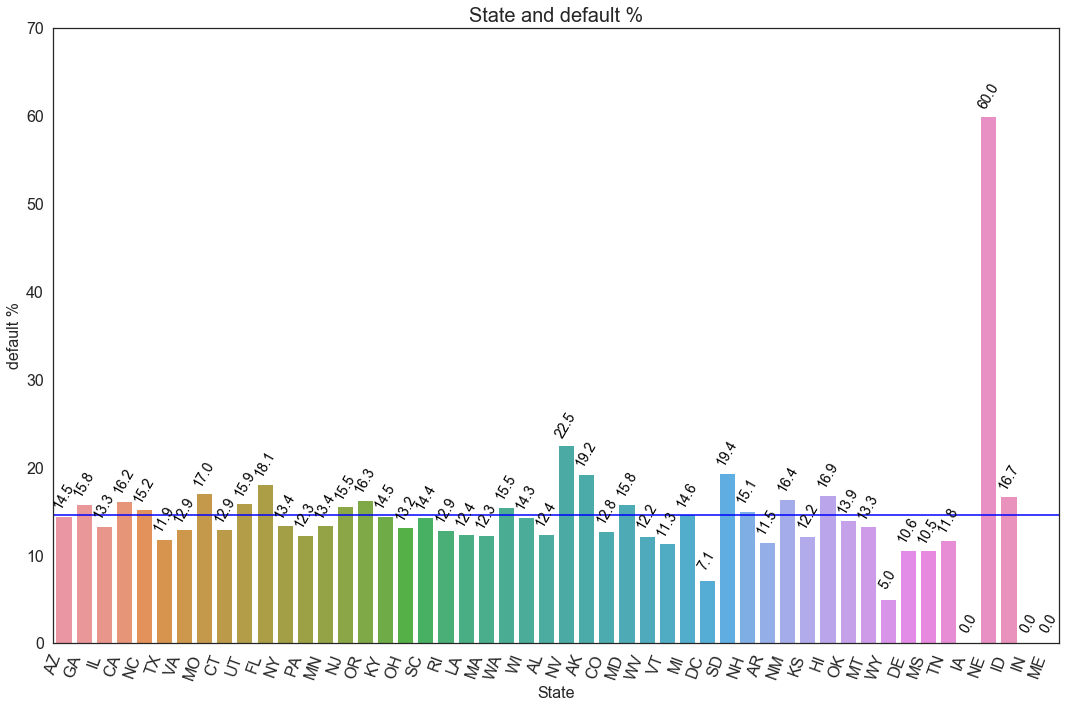

In [94]:
plt.figure(figsize=(15,10))
a_plot=sns.barplot(x = 'addr_state',
            y = 'status_code',
            data = dfl2,
           estimator = np.mean, ci=0
            )

a_plot.set(ylim=(0, 70))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', rotation=60,fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')

plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("State",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("State and default %",fontsize = 20)

plt.axhline(14.6, color='blue')
a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=70, ha="right")
plt.tight_layout()

plt.savefig('State2.png', bbox_inches='tight')

plt.show()

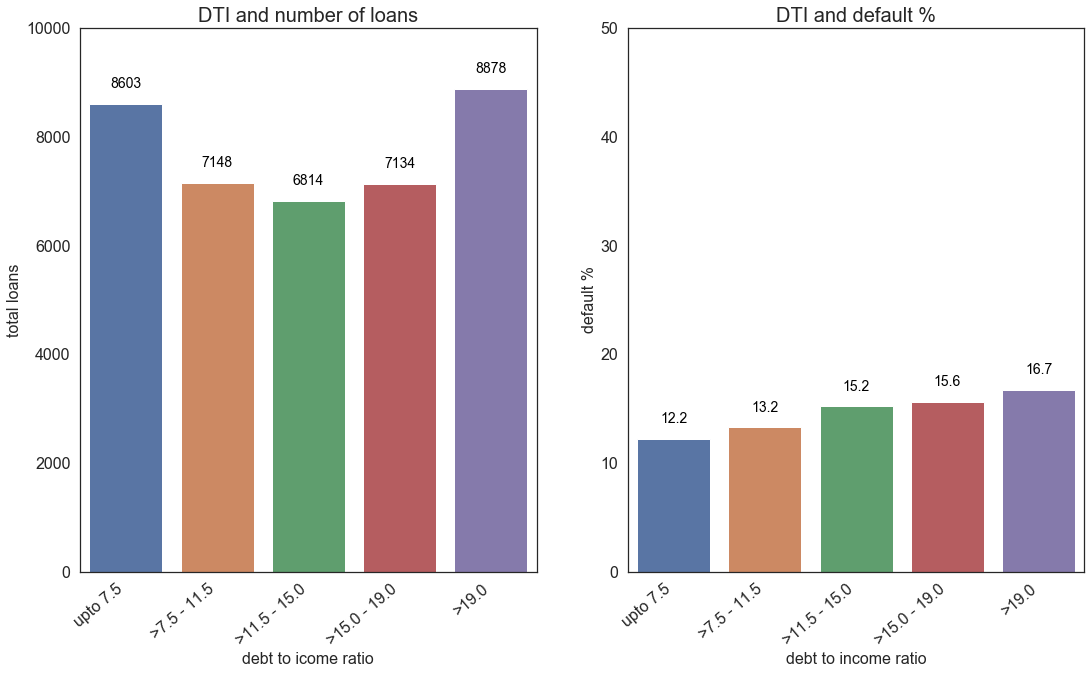

In [95]:
fig, axs = plt.subplots(figsize=(18, 10))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'dti_group',
            order = ["upto 7.5",">7.5 - 11.5",">11.5 - 15.0",">15.0 - 19.0",">19.0"],
            data = dfl2)

a_plot.set(ylim=(0, 10000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("debt to icome ratio",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("DTI and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'dti_group',
            y = 'status_code',
            order = ["upto 7.5",">7.5 - 11.5",">11.5 - 15.0",">15.0 - 19.0",">19.0"],
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("debt to income ratio",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("DTI and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")




plt.savefig('dti.png', bbox_inches='tight')

plt.show()

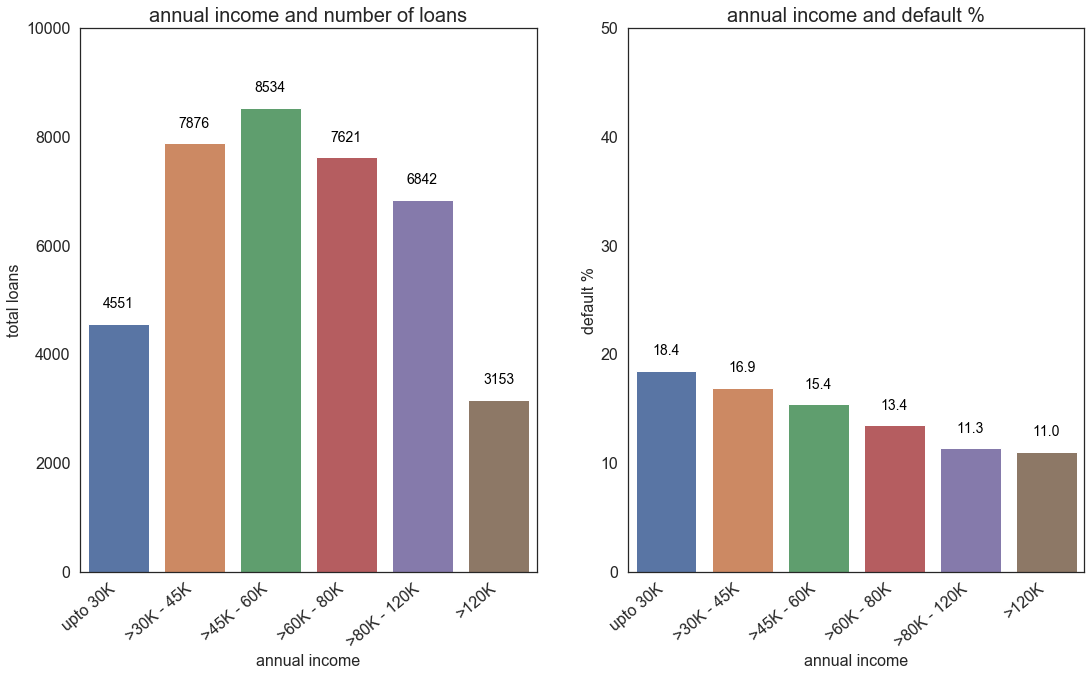

In [96]:
fig, axs = plt.subplots(figsize=(18, 10))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'annual_inc_group',
            order = ["upto 30K",">30K - 45K",">45K - 60K",">60K - 80K",">80K - 120K",">120K"],
            data = dfl2)

a_plot.set(ylim=(0, 10000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("annual income",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("annual income and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'annual_inc_group',
            y = 'status_code',
            order = ["upto 30K",">30K - 45K",">45K - 60K",">60K - 80K",">80K - 120K",">120K"],
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("annual income",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("annual income and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")




plt.savefig('annual income.png', bbox_inches='tight')

plt.show()

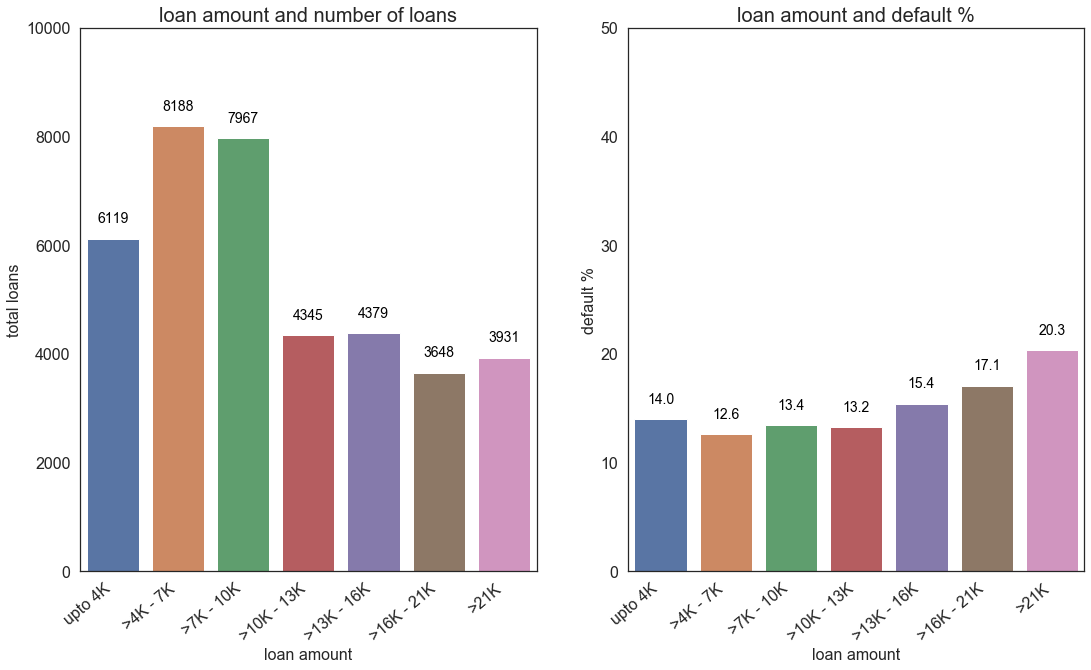

In [97]:
fig, axs = plt.subplots(figsize=(18, 10))

plt.subplot(1, 2, 1)
a_plot=sns.countplot(x = 'loan_amnt_group',
            order = ["upto 4K",">4K - 7K",">7K - 10K",">10K - 13K",">13K - 16K",">16K - 21K",">21K"],
            data = dfl2)

a_plot.set(ylim=(0, 10000))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("loan amount",fontsize = 16)
plt.ylabel("total loans",fontsize = 16)
plt.title("loan amount and number of loans",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")


plt.subplot(1, 2, 2)
a_plot=sns.barplot(x = 'loan_amnt_group',
            y = 'status_code',
            order = ["upto 4K",">4K - 7K",">7K - 10K",">10K - 13K",">13K - 16K",">16K - 21K",">21K"],
            data = dfl2, 
           estimator = np.mean,
            ci = 0)

a_plot.set(ylim=(0, 50))
ax=a_plot

for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                 textcoords='offset points')


plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("loan amount",fontsize = 16)
plt.ylabel("default %",fontsize = 16)
plt.title("loan amount and default %",fontsize = 20)

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=40, ha="right")




plt.savefig('loan amount.png', bbox_inches='tight')

plt.show()

# Bivariate Analysis
We would like to see which variables are closely related in defaults. For example, common characteristics amongst defaults. Let us ignore records with annual income above 150,000 as these appear to be outliers.


## Approach for analysis
Heatmap for finding correlation between numeric continuous variables
Heatmap for finding correlation between categorical variables (done in pairs) (convert discrete variables - month and employment length - to categorical by changing the data type to object)
Catplot for pair of one categorical variable and one continuous variable

In the above, analyse further by term (36 and 60 separately) and by status code (default and fully paid separately).


In [98]:
# creating dataframes with limited columns

dfba = dfl2[['annual_inc','dti','loan_amnt','int_rate','status_code','term','emp_length','month','grade',
            'verification_status','purpose','addr_state']]
dfba=dfba[dfba['annual_inc']<=150000]

df36=dfba[dfba['term']==36]
df36d=df36[df36['status_code']==100]
df36fp=df36[df36['status_code']==0]

df60=dfba[dfba['term']==60]
df60d=df60[df60['status_code']==100]
df60fp=df60[df60['status_code']==0]

array = ["CA","TX","FL","NY","NJ","IL","PA","GA"]
dfbacat=dfba.loc[dfba['addr_state'].isin(array)]
array = ["small_business","other","debt_consolidation", "major_purchase","home_improvement","credit_card"]
dfbacat=dfbacat.loc[dfbacat['purpose'].isin(array)]



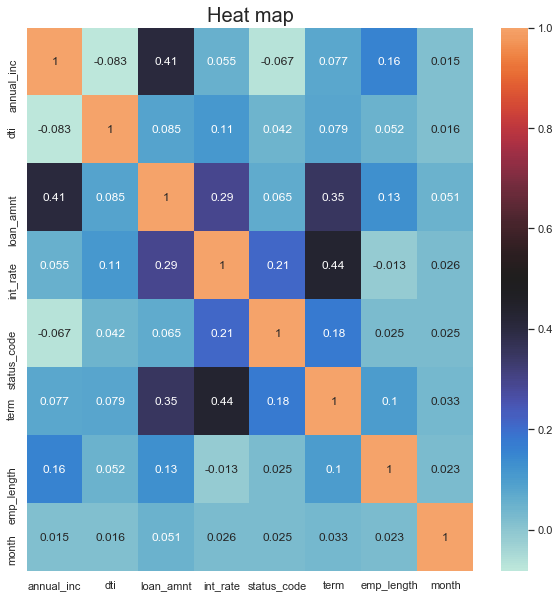

In [99]:
plt.figure(figsize=(10,10))
carr=(dfba.corr())
sns.heatmap(carr, annot=True, center=0.5)
plt.title("Heat map",fontsize = 20)
plt.savefig('heat map inc upto 150K.png', bbox_inches='tight')
plt.show()

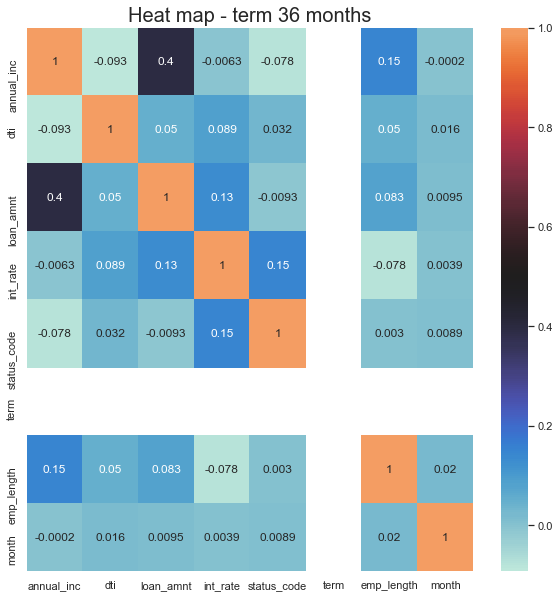

In [100]:
plt.figure(figsize=(10,10))
carr=(df36.corr())
sns.heatmap(carr, annot=True, center=0.5)
plt.title("Heat map - term 36 months",fontsize = 20)
plt.savefig('heat map 36.png', bbox_inches='tight')
plt.show()

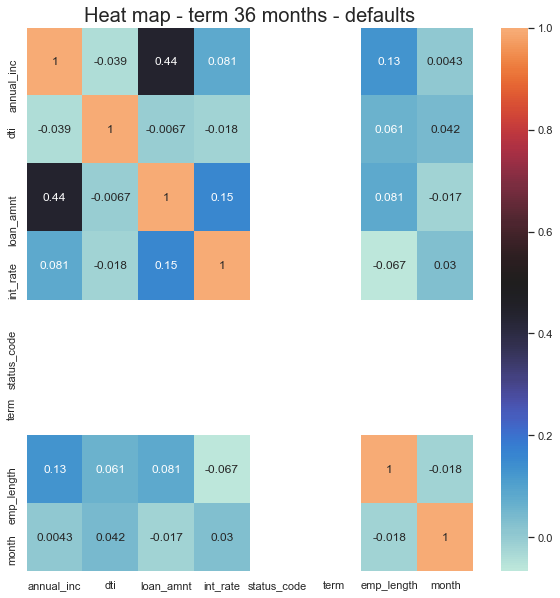

In [101]:
plt.figure(figsize=(10,10))
carr=(df36d.corr())
sns.heatmap(carr, annot=True, center=0.5)
plt.title("Heat map - term 36 months - defaults",fontsize = 20)
plt.savefig('heat map 36 default.png', bbox_inches='tight')
plt.show()

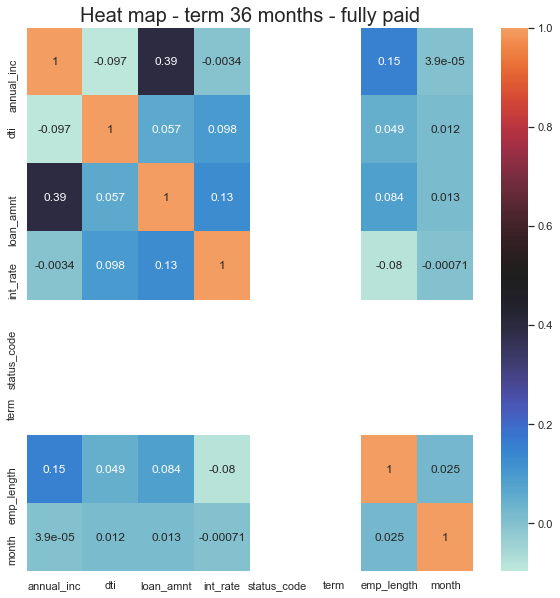

In [102]:
plt.figure(figsize=(10,10))
carr=(df36fp.corr())
sns.heatmap(carr, annot=True, center=0.5)
plt.title("Heat map - term 36 months - fully paid",fontsize = 20)
plt.savefig('heat map 36 fully paid.png', bbox_inches='tight')
plt.show()

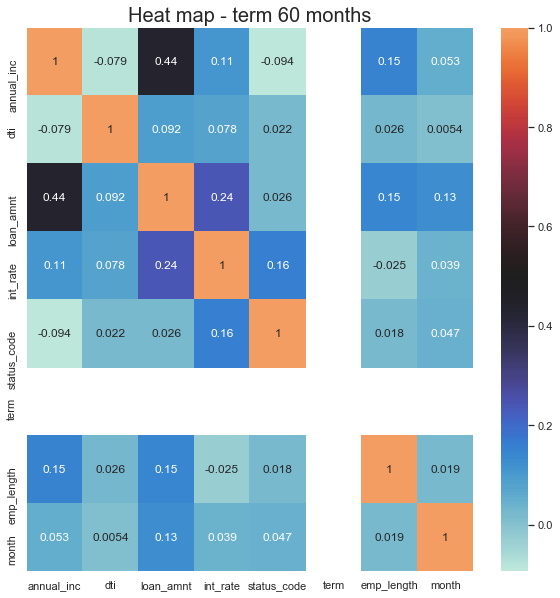

In [103]:
plt.figure(figsize=(10,10))
carr=(df60.corr())
sns.heatmap(carr, annot=True, center=0.5)
plt.title("Heat map - term 60 months",fontsize = 20)
plt.savefig('heat map 60.png', bbox_inches='tight')
plt.show()

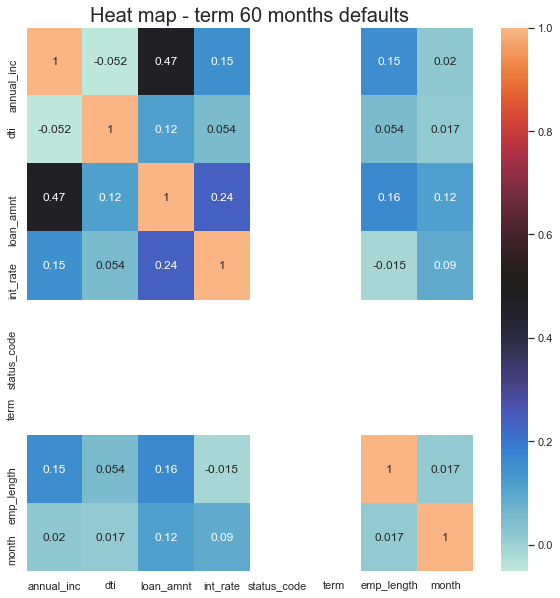

In [104]:
plt.figure(figsize=(10,10))
carr=(df60d.corr())
sns.heatmap(carr, annot=True, center=0.5)
plt.title("Heat map - term 60 months defaults",fontsize = 20)
plt.savefig('heat map 60 defaults.png', bbox_inches='tight')
plt.show()

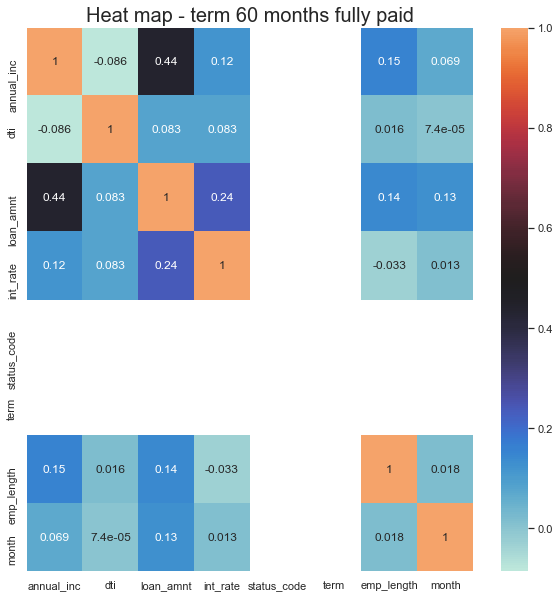

In [105]:
plt.figure(figsize=(10,10))
carr=(df60fp.corr())
sns.heatmap(carr, annot=True, center=0.5)
plt.title("Heat map - term 60 months fully paid",fontsize = 20)
plt.savefig('heat map 60 fully paid.png', bbox_inches='tight')
plt.show()

### observation
term 36 months - income and loan amount correlated 0.4; for defaults 0.44; for fully paid 0.39. correlation between other numeric variables low.

term 60 months - income and loan amount correlated 0.44; for defaults 0.47; for fully paid 0.44. correlation between other numeric variables low.


### Below plots created for many such combinations of one categorical variable and one continous variable

<Figure size 720x720 with 0 Axes>

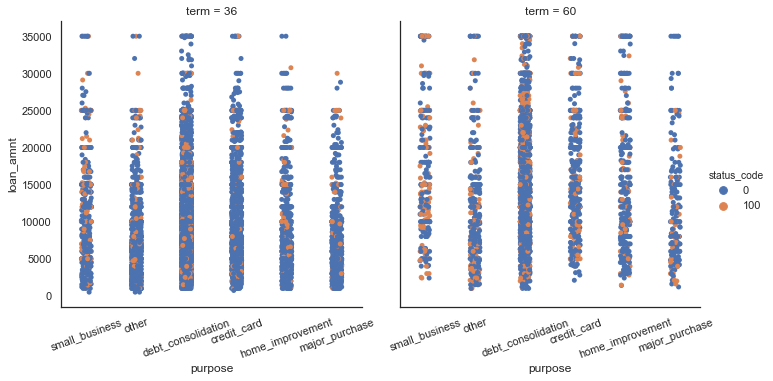

In [106]:

plt.figure(figsize=(10,10))
a_plot=sns.catplot(x="purpose", y="loan_amnt", hue="status_code",
            col="term",aspect=1,
             data=dfbacat)

for axes in a_plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=20, horizontalalignment='center')

plt.savefig('purpose and loan1.png', bbox_inches='tight')
plt.show()

### below plots created  for combination of various categorical variables

In [107]:
#converting month and empl length to objects for bivariate analysis with categorical variables
dfbacat['month'] = dfbacat['month'].astype(str)
dfbacat['emp_length'] = dfbacat['emp_length'].astype(str)


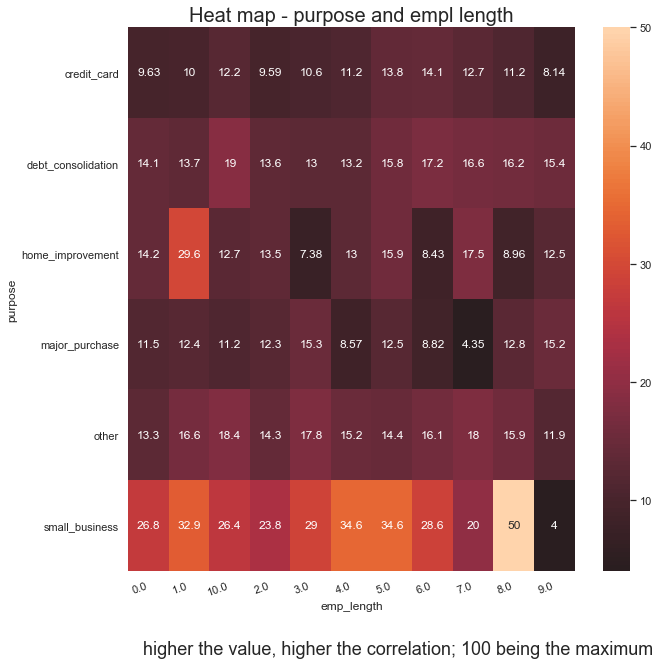

In [108]:
plt.figure(figsize=(10,10))
#dfbacat1=dfbacat[dfbacat['term']==60]
df_heatmap = dfbacat.pivot_table(values='status_code',index='purpose',columns='emp_length',aggfunc=np.mean)
a_plot=sns.heatmap(df_heatmap,annot=True, center=0.5, fmt='.3g')


plt.figtext(0.5, 0.01, "higher the value, higher the correlation; 100 being the maximum", 
            ha="center", fontsize=18, 
            bbox={"facecolor":"white", "alpha":0.5, "pad":5})

a_plot.set_xticklabels(a_plot.get_xticklabels(), rotation=20, ha="right")

plt.title("Heat map - purpose and empl length",fontsize = 20)
plt.savefig('purpose and empl length.png', bbox_inches='tight')
plt.show()




<Figure size 720x720 with 0 Axes>

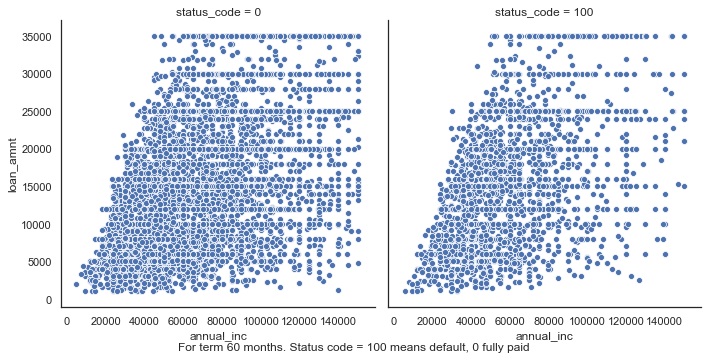

In [109]:
plt.figure(figsize=(10,10))
sns.relplot(
     x="annual_inc", y="loan_amnt",
    col="status_code", 
    #hue="day", 
    #style="day",
    kind="scatter",data=dfba[dfba['term'] == 60])

plt.figtext(0.5, 0.01, "For term 60 months. Status code = 100 means default, 0 fully paid", 
            ha="center", fontsize=12, 
            bbox={"facecolor":"white", "alpha":0.1, "pad":5})

plt.savefig('inc and loan 60 mths scatter.png', bbox_inches='tight')
plt.show()
#plt.title("loan amount and default %",fontsize = 20)

# Observations
1. observations on univariate and bivariate analyses mentioned in a separate presentation.
2. The coding can be much more efficient by creating user defined function and call this function to create many plots (univariate and bivariate). This would have helped in speed up the coding work, make the code look professional and perhaps execution time will be shorter.